# Alpha diversity comparison
cmp_rcplt makes a raincloud plot for comparison of sequence depth per method (mix of jitter, box and violin plot) to visualize how points are distributed, can hue with metadata not sure how yet to selct a variable in the function
use can do either -boxplot, violin plot or raincloud plot

### here just stuck @adding statistical testing &normal/homoscedastic plots

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

In [32]:
def cmp_rcplt (filenames, metadata = None, boxplot = False, violinplot = False):
    for i in range(len(filenames)-1):
        smpl = pd.merge(pd.read_csv(filenames[i]), pd.read_csv(filenames[i+1]), on = 'sample')
        smpl.rename(columns={'sample':'sample-id'}, inplace=True)
        smpl = pd.melt(smpl, id_vars='sample-id')
        
        if metadata:
            smpl = pd.merge( smpl, pd.read_csv(metadata), on = 'sample-id', how = 'left')
            rcp = pt.RainCloud(x = 'variable', y = 'value',
                 data = smpl, orient = 'h',
                 hue = 'depth_code', alpha=0.65)
            return; rcp
        
        if boxplot=True:
            rcp = plt.boxplot(smpl)
            rcp.set_xlabel('Method')
            rcp.set_ylabel('Sequencing depth')
            return; rcp
            
        if violinplot=True: 
            rcp = sns.violinplot(x='variable',y='value', data=smpl, hue = 'depth_code')
            return; rcp
        
        else: rcp = pt.RainCloud(x = 'variable', y = 'value',
                 data = smpl, orient = 'h')
            
    return rcp

In [33]:
files = ['~/Documents/didi/s2.csv','/home/diane/Documents/didi/s11.csv']
metadata = '/home/diane/Documents/didi/METADATA.csv'

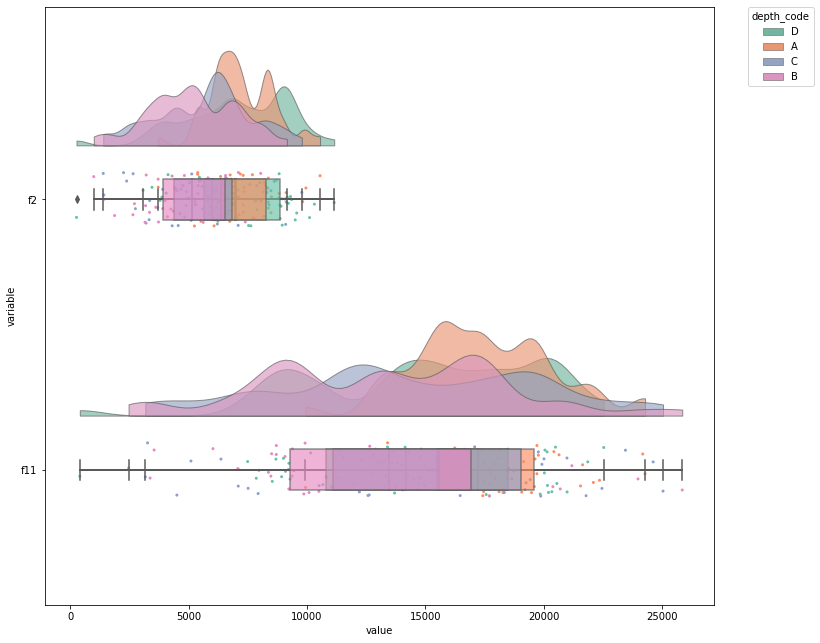

In [35]:
cmp_rcplt ( files, metadata, violinplot=True )

In [1]:
files = ['~/data/csv files/s2.csv','/Users/Diana/data/csv files/s27.csv','~/data/csv files/s97-2.csv']
meta = '/Users/Diana/data/metadata/METADATA.csv'

In [3]:
#if i work @mona
smpl = pd.merge(pd.read_csv('~/Documents/didi/s2.csv'), pd.read_csv('/home/diane/Documents/didi/s11.csv'), on = 'sample')

FileNotFoundError: [Errno 2] File b'/Users/Diana/Documents/didi/s2.csv' does not exist: b'/Users/Diana/Documents/didi/s2.csv'

# Wait... statistical thinking
In this function; import data and model evaluation  
if gaussian: use {parametric}  
else: use {nonparam}

In [19]:
#if i work on my laptop
smpl = pd.merge(pd.read_csv('~/data/csv files/s2.csv'), pd.read_csv('~/data/csv files/s11.csv'), on = 'sample')

In [24]:
files = ['~/data/csv files/s2.csv','~/data/csv files/s11.csv']

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import pandas as pd
from statsmodels.graphics.gofplots import qqplot

In [43]:
def stat_fun (filenames, metadata = None):
    for i in range(len(filenames)-1):
        smpl = pd.merge(pd.read_csv(filenames[i]), pd.read_csv(filenames[i+1]), on = 'sample')
        smpl.rename(columns={'sample':'sample-id'}, inplace=True)
        smpl = pd.melt(smpl.iloc[:,1:len(smpl)])
        smpl = smpl.iloc[:,1]
        
        if metadata:
            smpl = pd.merge( smpl, pd.read_csv(metadata), on = 'sample-id', how = 'left')
            return; 
            
    return [qqplot(smpl,line='s'), print ("Shapiro test (test statistic, p-value)", stats.shapiro(smpl)) ]

SyntaxError: unexpected character after line continuation character (<ipython-input-43-a811e32513b3>, line 12)

Shapiro test (test statistic, p-value) (0.9362155199050903, 4.597005068274207e-12)


[<Figure size 432x288 with 1 Axes>, None]

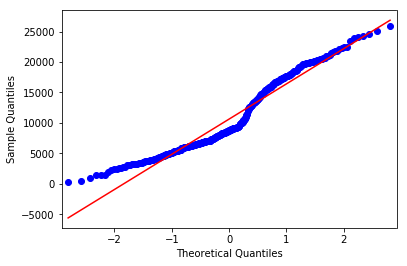

In [39]:
stat_fun (files)